<a href="https://colab.research.google.com/github/Alekhyo/Regression/blob/master/Linear_Regression_using_OLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [0]:
def plotData(x, y):
  '''
  A function to plot a graph between Salary and Year_of_Experience
  '''
    fig = plt.figure()
    plt.style.use('ggplot')
    plt.plot(X, Y, 'ro', ms=8, mec='k',label='Data points')
    plt.ylabel('Years in Experience')
    plt.xlabel('Salary')
    plt.legend()

In [0]:
data=pd.read_csv('Salary_Data.csv')

## Analysing Data

In [0]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [0]:
data.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [0]:
X=data.loc[:,'YearsExperience'].values 

In [0]:
Y=data.loc[:,'Salary'].values         

### Visualising Data

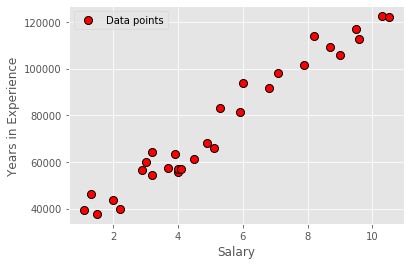

In [0]:
plotData(X,Y)

# Linear Regression (using OLS)

In [0]:
class LinearRegression():
    def __init__(self):
        self._X_mean=0
        self._Y_mean=0
        self._slope=0
        self._intercept=0
    
    def fit(self,X_data,Y_data):  # fit() function calculates slope and intercept of the best fit line
        '''The formula for the best fit line :
            y = m*x+b, where
            
            m = slope
            b = intercept
            
            Now, m = sum((Xi - X_bar)*(Yi - Y_bar))/((Xi - X_bar)^2)
                 b = Y_bar - (m*X_bar)
        '''
        self._X_mean=X_data.mean()
        self._Y_mean=Y_data.mean()
        self._slope=np.sum((X_data-self._X_mean)*(Y_data-self._Y_mean))/(np.sum(np.square(X_data-self._X_mean)))
        self._intercept=self._Y_mean-self._slope*self._X_mean
    
    def predict(self,X_data):  #predict() function predicts Y for given values of X
        Y_pred=self._slope*X_data+self._intercept
        return Y_pred
    
    def calculate_r2(self,Y_test,Y_predict):
        '''The formula for r2_score is:
            r2=1-sum(Y_test-Y_predict)^2/sum(Y_test-Y_predict_bar)^2
        '''
        r2=1-(np.sum(np.square(Y_test-Y_predict))/np.sum(np.square(Y_test-Y_predict.mean())))
        return r2

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)  #Splitting data into test points&train points

## Predicting Model

In [0]:
lr=LinearRegression()
lr.fit(X_train,Y_train)
Y_predict=lr.predict(X_test)
r2_score=lr.calculate_r2(Y_test,Y_predict)

In [0]:
print("R2 score for this model is ",r2_score)

R2 score for this model is  0.9695946694857468


## Visualising the best fit line

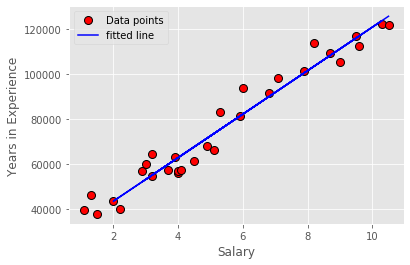

In [0]:
plotData(X,Y)
plt.plot(X_test,Y_predict,color='blue', label='fitted line')
plt.legend()
plt.show()